In [1]:
# set some ipython notebook properties
%matplotlib inline

# set degree of verbosity (adapt to INFO for more verbose output)
import logging
logging.basicConfig(level=logging.WARNING)

# set figure sizes
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# set display width for pandas data frames
import pandas as pd
pd.set_option('display.width', 1000)

In [20]:
# import the algorithm
from fastlmm.association import single_snp
from pysnptools.snpreader import Pheno

# set up data
##############################
bed_fn = "./data/plink_files/atchley.bed"
pheno = "./data/fastlmm_pheno.txt"
cov_fn = "./data/fastlmm_cov.txt"

# run gwas
###################################################################
results_df = single_snp( bed_fn, pheno=pheno, covar = cov_fn, count_A1=True)

/home/diogro/bin/anaconda3/envs/limmbo/lib/python2.7/site-packages/pysnptools/snpreader/snpreader.py:625: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.string_ == np.dtype(str).type`.
  assert np.issubdtype(self._row.dtype, str) and len(self._row.shape)==2 and self._row.shape[1]==2, "iid should be dtype str, have two dimensions, and the second dimension should be size 2"
/home/diogro/bin/anaconda3/envs/limmbo/lib/python2.7/site-packages/pysnptools/snpreader/snpreader.py:626: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.string_ == np.dtype(str).type`.
  assert np.issubdtype(self._col.dtype, str) and len(self._col.shape)==1, "sid should be of dtype of str and one dimensional"
/home/diogro/bin/anaconda3/envs/limmbo/lib/python2.7/site-packages/pysnptools/kernelreader/kernelreader.py:325: FutureWarning: Conversion 

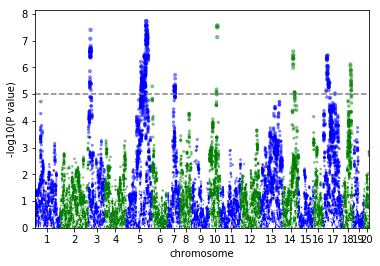

lambda=2.3033


,sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
0,2197,AX-168426259,5.0,62.415,122961646.0,1.859907e-08,-0.559552,0.099080,0.124948,0.0,0.244256
1,2202,AX-168399814,5.0,62.446,123013233.0,1.934209e-08,-0.558871,0.099080,0.124799,0.0,0.244256
2,2183,AX-168406580,5.0,61.889,122065286.0,2.590210e-08,-0.551327,0.098639,0.123682,0.0,0.244256
3,2199,AX-168413648,5.0,62.420,122970851.0,2.613698e-08,-0.553106,0.098986,0.123647,0.0,0.244256
4,856,AX-168420655,10.0,50.827,98142348.0,2.719633e-08,0.555340,0.099511,0.123494,0.0,0.240583
5,2184,AX-168402685,5.0,61.906,122117180.0,2.855108e-08,-0.549477,0.098612,0.123307,0.0,0.244256
6,2196,AX-168416834,5.0,62.415,122961646.0,2.882217e-08,-0.550487,0.098823,0.123270,0.0,0.244256
7,855,AX-168403658,10.0,50.827,98142348.0,2.972976e-08,0.553741,0.099505,0.123151,0.0,0.240583
8,2201,AX-168378634,5.0,62.433,122991984.0,3.220620e-08,-0.548885,0.098884,0.122842,0.0,0.244256
9,851,AX-168381012,10.0,50.378,97173547.0,3.232747e-08,0.552229,0.099499,0.122827,0.0,0.240583


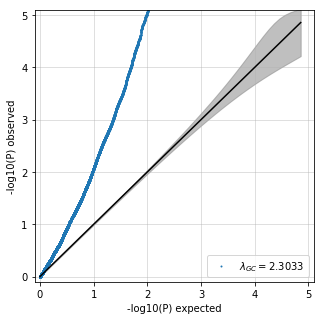

In [23]:
# manhattan plot
import pylab
import fastlmm.util.util as flutil
flutil.manhattan_plot(results_df.as_matrix(["Chr", "ChrPos", "PValue"]),pvalue_line=1e-5,xaxis_unit_bp=False)
pylab.show()

# qq plot
from fastlmm.util.stats import plotp
plotp.qqplot(results_df["PValue"].values, xlim=[0,5], ylim=[0,5])

# print head of results data frame
import pandas as pd
pd.set_option('display.width', 2000)
results_df.head(n=10)

In [24]:
# example for two kernel feature selection
# this takes a couple of minutes to run on a 20-proc machine.
from pysnptools.snpreader import Bed
from fastlmm.association import single_snp_all_plus_select

from fastlmm.util.runner import LocalMultiProc
runner = LocalMultiProc(20,mkl_num_threads=5)
    
# define file names
snp_reader = Bed("./data/plink_files/atchley", count_A1=True)
pheno_fn = "./data/fastlmm_pheno.txt"
cov_fn = "./data/fastlmm_cov.txt"

# find the chr5 SNPs
test_snps = snp_reader[:,snp_reader.pos[:,0] == 5]

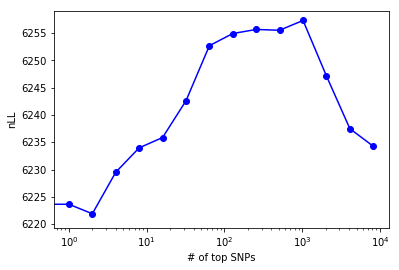

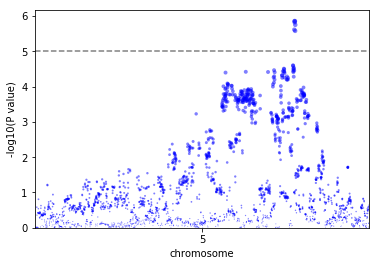

,sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
0,2196,AX-168416834,5.0,62.415,122961646.0,0.000001,-0.645355,0.133335,0.107282,0.0,0.155188
1,2199,AX-168413648,5.0,62.420,122970851.0,0.000001,-0.646255,0.133539,0.107268,0.0,0.155188
2,2197,AX-168426259,5.0,62.415,122961646.0,0.000002,-0.644945,0.133693,0.106931,0.0,0.155188
3,2202,AX-168399814,5.0,62.446,123013233.0,0.000002,-0.640453,0.133688,0.106199,0.0,0.155188
4,2194,AX-168388504,5.0,62.412,122957815.0,0.000002,-0.631337,0.133580,0.104788,0.0,0.155188


In [26]:
#select the 2nd kernel and run GWAS
results_df = single_snp_all_plus_select(test_snps=test_snps,G=snp_reader,
                                        pheno=pheno_fn,GB_goal=2,do_plot=True,runner=runner)

import fastlmm.util.util as flutil
flutil.manhattan_plot(results_df.as_matrix(["Chr", "ChrPos", "PValue"]),pvalue_line=1e-5,xaxis_unit_bp=False)
pylab.show()

results_df.head()